In [1]:
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from clustergram import Clustergram
import warnings
warnings.filterwarnings("ignore")

## 测试

In [2]:
# 加载数据
df = sns.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

# 拟合
cgram = Clustergram(range(1, 12), n_init=10, verbose=False)
cgram.fit(data)

Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10})

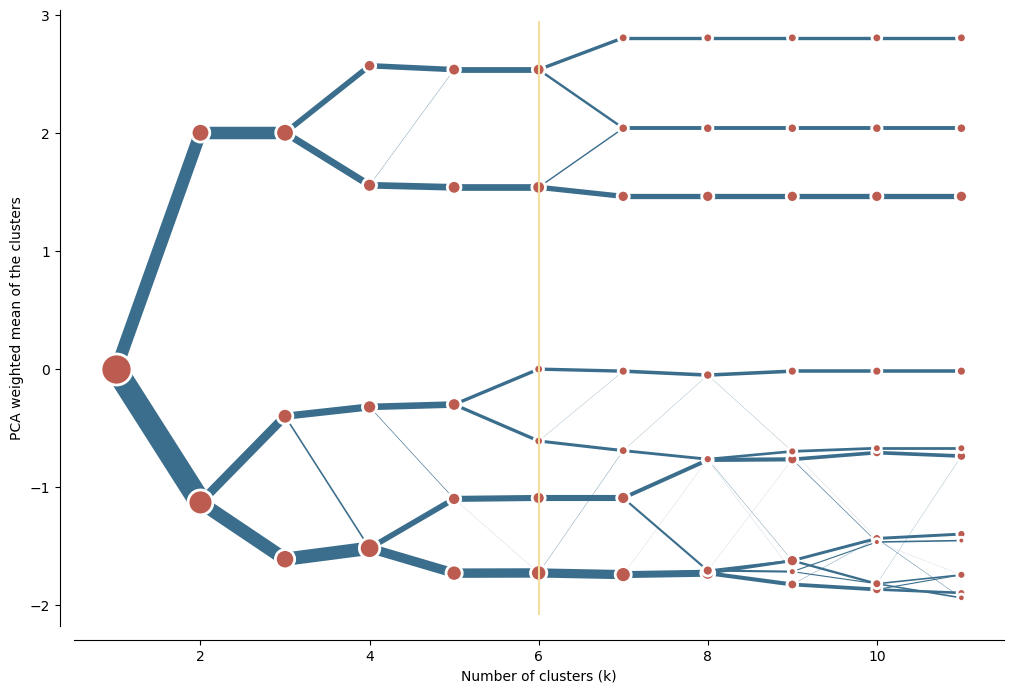

In [3]:
# 绘制
fig, ax = plt.subplots(1, figsize=(12, 8))
cgram.plot(
    size=1,
    linewidth=0.5,
    cluster_style={"color": "#bc5b4f", "linewidth": 2, "edgecolor": "white"},
    line_style={"color": "#3b6e8c"},
    ax=ax
)
sns.despine(offset=10)
ax.axvline(6, color='#f5dfa0', ymin=.02, ymax=.98)
plt.show()

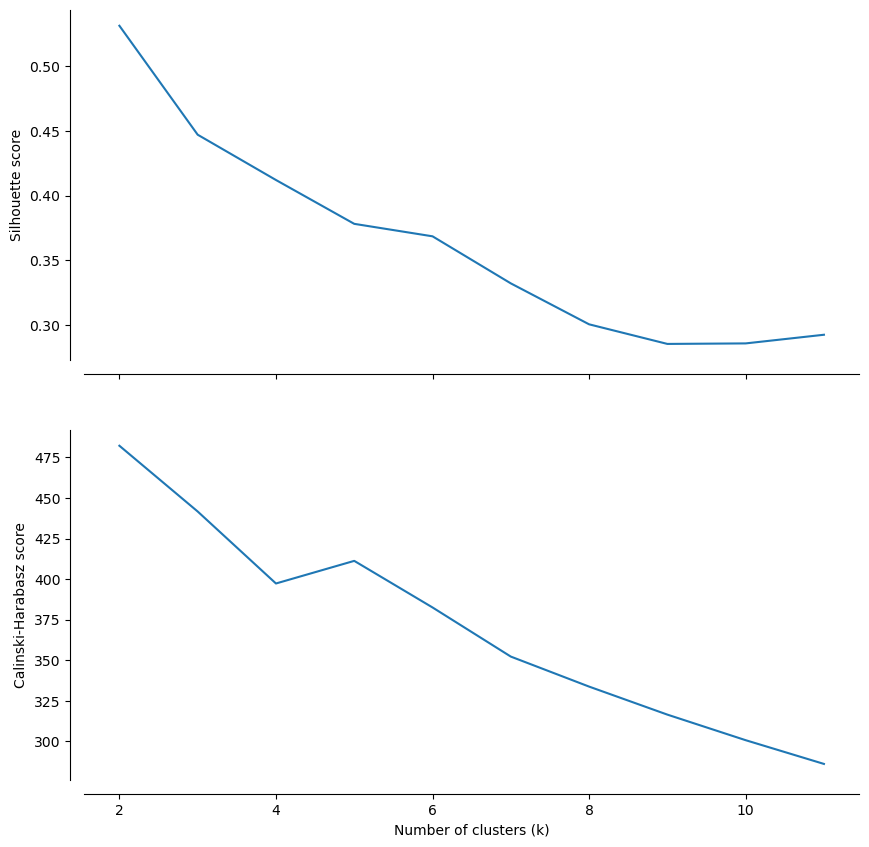

In [4]:
fig, axs = plt.subplots(2, figsize=(10, 10), sharex=True)
cgram.silhouette_score().plot(xlabel="Number of clusters (k)", ylabel="Silhouette score", ax=axs[0])
cgram.calinski_harabasz_score().plot(xlabel="Number of clusters (k)", ylabel="Calinski-Harabasz score", ax=axs[1])
sns.despine(offset=10)

## k-means

In [5]:
penguins = sns.load_dataset("penguins")
data = scale(penguins.drop(columns=['species', 'island', 'sex']).dropna())

In [6]:
cgram = Clustergram(range(1, 10), n_init=100, verbose=False)
cgram.fit(data)

Clustergram(k_range=range(1, 10), backend='sklearn', method='kmeans', kwargs={'n_init': 100})

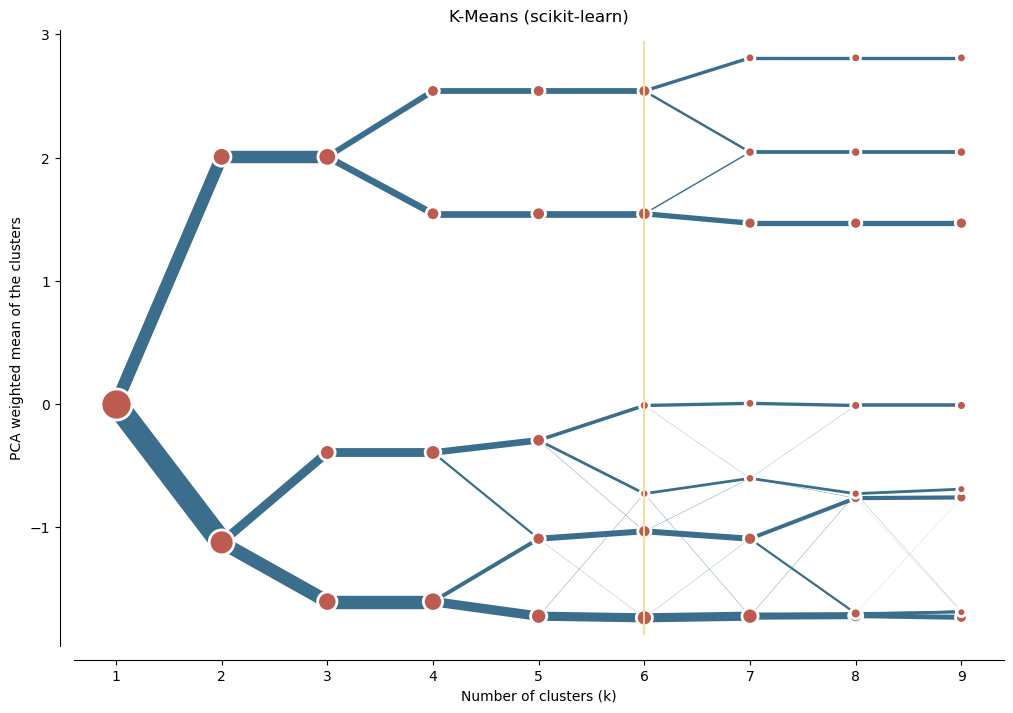

In [7]:
fig, ax = plt.subplots(1, figsize=(12, 8))
cgram.plot(
    size=1,
    linewidth=0.5,
    cluster_style={"color": "#bc5b4f", "linewidth": 2, "edgecolor": "white"},
    line_style={"color": "#3b6e8c"},
    ax=ax
)
ax.axvline(6, color='#f5dfa0', ymin=.02, ymax=.98)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')
plt.show()

## Gaussian Mixture

In [8]:
cgram = Clustergram(range(1, 10), n_init=100, method="gmm", verbose=False)
cgram.fit(data)

Clustergram(k_range=range(1, 10), backend='sklearn', method='gmm', kwargs={'n_init': 100})

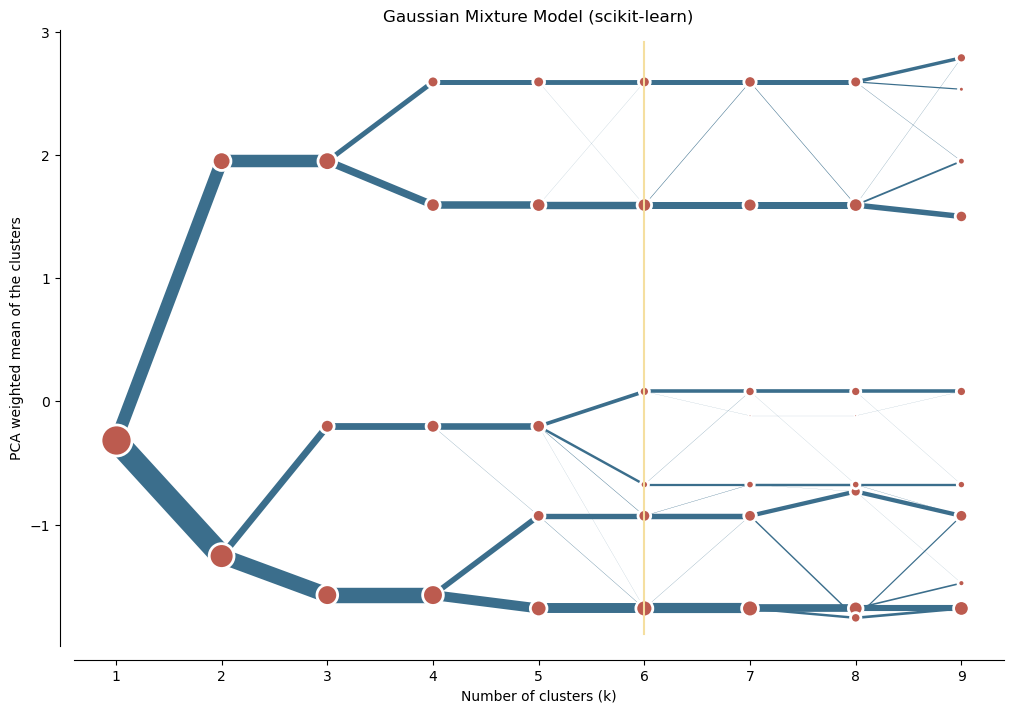

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 8))
cgram.plot(
    size=1,
    linewidth=0.5,
    cluster_style={"color": "#bc5b4f", "linewidth": 2, "edgecolor": "white"},
    line_style={"color": "#3b6e8c"},
    ax=ax
)
ax.axvline(6, color='#f5dfa0', ymin=.02, ymax=.98)
sns.despine(offset=10)
ax.set_title('Gaussian Mixture Model (scikit-learn)')
plt.show()